In [ ]:
## CODE 01

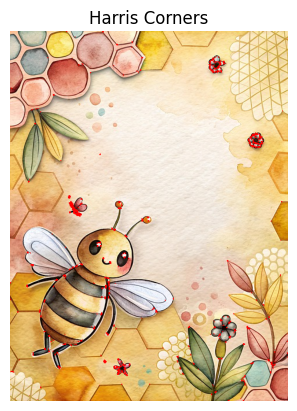

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread('bee-8790316_640.jpg')  # replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Step 1: Compute gradients Ix and Iy using Sobel operators
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Step 2: Compute products of derivatives
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

# Step 3: Apply Gaussian filter to smooth the squared gradients
Ix2 = cv2.GaussianBlur(Ix2, (3, 3), sigmaX=1)
Iy2 = cv2.GaussianBlur(Iy2, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

# Step 4: Compute Harris Response R
k = 0.04
det_M = Ix2 * Iy2 - Ixy ** 2
trace_M = Ix2 + Iy2
R = det_M - k * (trace_M ** 2)

# Step 5: Threshold on R to mark corners
corner_threshold = 0.01 * R.max()
img[R > corner_threshold] = [0, 0, 255]  # mark corners in red

# Show the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners")
plt.axis("off")
plt.show()


In [ ]:
## CODE 02

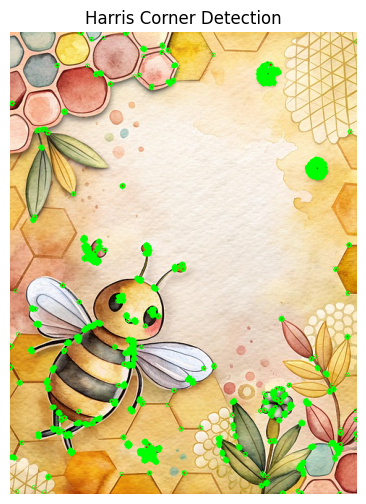

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the image
img = cv2.imread('bee-8790316_640.jpg')  # Your actual image file
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Step 1: Compute gradients
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Step 2: Compute products of derivatives
Ix2 = cv2.GaussianBlur(Ix ** 2, (3, 3), sigmaX=1)
Iy2 = cv2.GaussianBlur(Iy ** 2, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ix * Iy, (3, 3), sigmaX=1)

# Step 3: Compute Harris Response
k = 0.04
R = (Ix2 * Iy2 - Ixy**2) - k * (Ix2 + Iy2)**2

# Step 4: Thresholding on R
corner_threshold = 0.01 * R.max()
corner_mask = R > corner_threshold

# Copy of original image for drawing
corner_img = img.copy()
corner_img[corner_mask] = [0, 0, 255]  # mark corners as red

# Optional: draw small circles on corners
ys, xs = np.where(corner_mask)
for (x, y) in zip(xs, ys):
    cv2.circle(corner_img, (x, y), 3, (0, 255, 0), 1)

# Show final result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()


In [ ]:
# Red pixels: where Harris function R exceeded the threshold — likely corners.

# Green circles: clear, visually-separated corners.

# "These are points where shifting the image patch in any direction gives a large change in intensity — meaning it's a 'corner'."